In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
pd.set_option("display.max_columns",None)


### Abstract
Understanding the tastes of each user and the characteristics of each product is necessary to predict how a user will respond to a new product. This latent user and product dimensions can be discovered with the help of user feedback. A numeric rating and its accompanying text review is the most widely available form of user feedback. A measure which encapsulates the contents of such reviews is often necessary as they have been found to significantly influence the shopping behaviour of users. A fine-grained form of such measure that could act as perfect feedback about the product is a star rating. The review rating prediction tries to predict a rating corresponding to the given review.

### Problem Statement:
Given the google rating data, use a hierarchical clustering algorithm to 
cluster reviews.
Dataset Information:
This data set is populated by capturing user ratings from Google reviews. 
Reviews on attractions from 24 categories across Europe are considered. 
Google user rating ranges from 1 to 5 and the average user rating per 
category is calculated

## Variable Description:
Column Description
User Unique user id
Attribute 1 Average ratings on churches, 
Attribute 2 Average ratings on resort,
Attribute 3 Average ratings on beaches,
Attribute 4 Average ratings on parks,
Attribute 5 Average ratings on theatres,
Attribute 6 Average ratings on museums,
Attribute 7 Average ratings on malls,
Attribute 8 Average ratings on zoo,
Attribute 9 Average ratings on restaurants,
Attribute 10 Average ratings on pubs/bars,
Attribute 11 Average ratings on local services,
Attribute 12 Average ratings on burger/pizza shops,
Attribute 13 Average ratings on hotels/other lodgings,
Attribute 14 Average ratings on juice bars,
Attribute 15 Average ratings on art galleries,
Attribute 16 Average ratings on dance clubs,
Attribute 17 Average ratings on swimming pools,
Attribute 18 Average ratings on gyms,
Attribute 19 Average ratings on bakeries,
Attribute 20 Average ratings on beauty & spas,
Attribute 21 Average ratings on cafes,
Attribute 22 Average ratings on viewpoints,
Attribute 23 Average ratings on monuments,
Attribute 24 Average ratings on gardens





## Scope:
● Analyzing the existing data and getting valuable insights about the
review pattern
● Data pre-processing including missing value treatment
● Cluster the reviews based on the optimum number of clusters (‘k’)
with the help of dendrogram



## Learning Outcome:
The students will get a better understanding of how the variables are
linked to each other and will be able to apply hierarchical clustering to
determine review types.

In [2]:
data=pd.read_csv(r"google_review_ratings.csv",index_col=0,header=0)

In [3]:
data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
data.shape

(5456, 25)

In [5]:
data.isnull().sum()

Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  C

In [7]:
data["Category 11"].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [8]:
data.drop(data[data["Category 11"]=="2\t2."].index,inplace=True)

In [9]:
data.drop(["Unnamed: 25"],axis=1,inplace=True)

In [10]:
data.shape

(5455, 24)

In [11]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category 1,5455.0,NaN,NaN,NaN,1.455674,0.827673,0.0,0.92,1.34,1.81,5.0
Category 2,5455.0,NaN,NaN,NaN,2.319824,1.421542,0.0,1.36,1.91,2.685,5.0
Category 3,5455.0,NaN,NaN,NaN,2.48952,1.247852,0.0,1.54,2.06,2.74,5.0
Category 4,5455.0,NaN,NaN,NaN,2.797192,1.309084,0.83,1.73,2.46,4.095,5.0
Category 5,5455.0,NaN,NaN,NaN,2.959278,1.338948,1.12,1.77,2.67,4.315,5.0
Category 6,5455.0,NaN,NaN,NaN,2.893809,1.282301,1.11,1.79,2.68,3.84,5.0
Category 7,5455.0,NaN,NaN,NaN,3.351778,1.413338,1.12,1.93,3.23,5.0,5.0
Category 8,5455.0,NaN,NaN,NaN,2.541047,1.111338,0.86,1.62,2.17,3.19,5.0
Category 9,5455.0,NaN,NaN,NaN,3.126301,1.356767,0.84,1.8,2.8,5.0,5.0
Category 10,5455.0,NaN,NaN,NaN,2.833093,1.307509,0.81,1.64,2.68,3.53,5.0


In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [14]:
data.shape

(5454, 24)

In [15]:
data.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [16]:
data.dtypes.value_counts()

float64    23
object      1
dtype: int64

In [17]:
data["Category 11"].unique()


array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [18]:
data["Category 11"]=data["Category 11"].astype(float)

In [19]:
data.dtypes.value_counts()

float64    24
dtype: int64

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.shape

(5451, 24)

In [27]:
data.columns= [ 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

In [28]:
data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
churches,5451.0,1.456353,0.827472,0.00,0.92,1.34,1.810,5.0
resorts,5451.0,2.321123,1.421176,0.00,1.36,1.91,2.690,5.0
beaches,5451.0,2.488580,1.247208,0.00,1.54,2.06,2.740,5.0
parks,5451.0,2.797112,1.309352,0.83,1.73,2.46,4.100,5.0
theatres,5451.0,2.958437,1.338420,1.12,1.77,2.67,4.310,5.0
museums,5451.0,2.893300,1.281983,1.11,1.79,2.68,3.835,5.0
malls,5451.0,3.351214,1.413100,1.12,1.93,3.23,5.000,5.0
zoo,5451.0,2.541482,1.111569,0.86,1.62,2.17,3.190,5.0
restaurants,5451.0,3.127004,1.356976,0.84,1.80,2.80,5.000,5.0
pubs_bars,5451.0,2.832352,1.307326,0.81,1.64,2.68,3.525,5.0


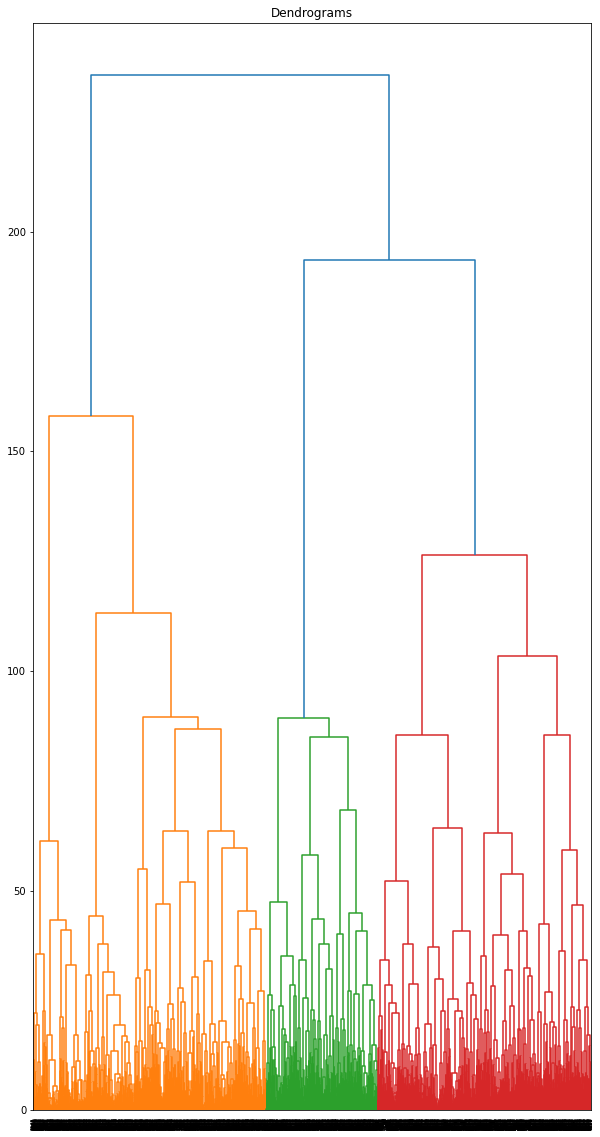

In [34]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))


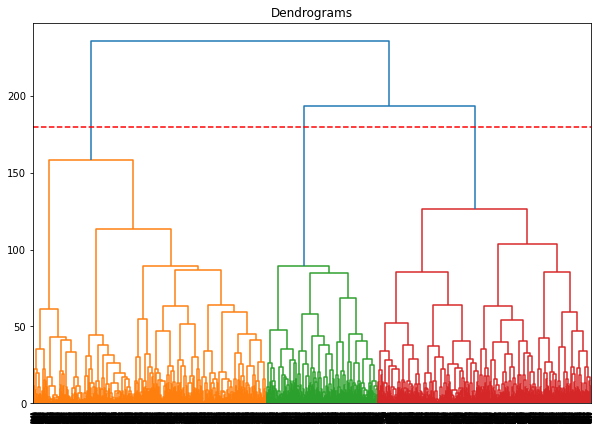

In [35]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=180,color="r", linestyle="--")

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster =AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
Y_pred=cluster.fit_predict(data)


In [39]:
data["Clusters"]=Y_pred
data.head(20)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1


In [73]:
data.Clusters.value_counts()

0    2277
1    2084
2    1090
Name: Clusters, dtype: int64

In [74]:
clust0=data[data["Clusters"]==0]

In [75]:
clust0.shape

(2277, 25)

In [76]:
clust0.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 41,0.54,0.57,0.67,3.71,5.00,2.95,2.94,2.59,1.66,2.27,5.00,1.59,1.58,1.59,1.62,0.70,0.54,0.00,0.0,0.00,0.50,0.00,0.51,0.54,0
User 57,0.69,0.69,0.72,5.00,3.83,2.96,2.94,5.00,2.89,2.16,5.00,1.44,1.43,1.43,1.55,1.56,0.63,0.00,0.0,0.00,0.50,0.63,0.62,0.64,0
User 122,0.73,5.00,1.34,1.33,1.35,1.37,4.11,5.00,5.00,2.30,1.61,1.59,5.00,5.00,0.79,0.78,0.80,0.82,1.1,0.78,0.65,0.65,0.67,0.88,0
User 123,5.00,5.00,5.00,1.33,1.34,1.37,4.15,5.00,2.85,2.76,1.61,1.59,5.00,5.00,0.81,0.78,0.79,0.81,1.1,0.67,0.65,0.64,0.67,0.89,0
User 124,0.73,1.25,1.34,1.33,1.34,4.71,4.12,5.00,5.00,2.76,1.61,1.59,0.84,4.90,0.81,0.78,0.78,0.81,1.1,1.83,0.65,0.64,0.66,0.69,0


In [77]:
clust0.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
count,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.0
mean,1.083333,1.981932,1.961260,2.103878,2.260659,2.647497,3.841845,3.042600,3.944067,3.679192,3.216394,2.558726,2.525288,3.003197,2.858037,1.133641,0.770755,0.586430,0.692323,0.722894,0.694352,0.929758,0.875428,0.995143,0.0
std,0.648835,1.540265,0.979239,0.934014,1.015711,1.243331,1.339921,1.160026,1.087870,1.155391,1.385125,1.342545,1.471360,1.774393,1.917762,1.225591,0.782630,0.583121,0.839942,0.861520,0.450138,0.750977,0.435991,0.501072,0.0
min,0.000000,0.000000,0.000000,1.240000,1.250000,1.270000,1.290000,0.890000,0.900000,0.870000,0.820000,0.820000,0.800000,0.800000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.760000,1.110000,1.430000,1.450000,1.490000,1.600000,2.740000,1.870000,2.880000,2.770000,2.240000,1.610000,1.520000,1.350000,0.900000,0.650000,0.560000,0.510000,0.500000,0.500000,0.520000,0.630000,0.660000,0.730000,0.0
50%,1.070000,1.420000,1.590000,1.740000,1.800000,2.120000,4.910000,3.160000,4.290000,3.320000,2.800000,2.160000,1.760000,2.260000,1.950000,0.750000,0.660000,0.620000,0.620000,0.640000,0.710000,0.820000,0.900000,1.000000,0.0
75%,1.380000,1.830000,2.020000,2.550000,2.720000,3.210000,5.000000,4.010000,5.000000,5.000000,5.000000,2.820000,3.500000,5.000000,5.000000,0.840000,0.760000,0.750000,0.790000,0.820000,0.940000,1.160000,1.160000,1.360000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


In [78]:
clust1=data[data["Clusters"]==1]
print(clust1.shape)
clust1.head()


(2084, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


In [79]:
clust1.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
count,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.0
mean,1.441670,2.433282,2.988129,3.777543,4.155667,3.650720,3.499597,2.486468,2.847879,2.576939,2.353536,1.898536,2.009631,1.487399,1.441300,1.050605,0.744141,0.560595,0.579559,0.695326,0.855235,2.223239,1.865048,1.725504,1.0
std,0.621349,1.366397,1.402209,1.250861,1.038971,1.169109,1.302992,0.948283,1.212093,1.104387,1.306659,1.220395,1.463379,1.018171,1.054294,0.758539,0.506165,0.373384,0.438233,0.730706,0.851732,1.890491,1.651898,1.308345,0.0
min,0.000000,0.000000,0.520000,0.830000,1.280000,1.540000,1.520000,0.900000,0.860000,0.830000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.070000,1.340000,1.830000,2.630000,3.137500,2.840000,2.360000,1.720000,1.770000,1.660000,1.570000,1.060000,0.947500,0.870000,0.800000,0.690000,0.540000,0.500000,0.510000,0.530000,0.560000,0.770000,0.840000,1.047500,1.0
50%,1.320000,2.160000,2.580000,4.160000,4.980000,3.260000,3.240000,2.600000,2.675000,2.590000,1.790000,1.560000,1.530000,1.170000,1.090000,0.830000,0.740000,0.620000,0.620000,0.650000,0.720000,1.070000,1.090000,1.310000,1.0
75%,1.830000,2.740000,5.000000,5.000000,5.000000,5.000000,5.000000,2.930000,3.362500,2.950000,2.810000,1.800000,1.820000,1.660000,1.602500,1.150000,0.910000,0.780000,0.770000,0.760000,0.860000,5.000000,1.720000,1.690000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0


In [80]:
clust2=data[data["Clusters"]==2]
print(clust2.shape)
clust2.head()

(1090, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 179,1.50,1.86,1.86,1.71,3.19,4.36,4.55,5.00,5.00,1.67,1.62,1.66,0.92,0.90,0.65,0.52,0.51,0.52,0.53,5.00,1.08,1.32,1.31,1.33,2
User 180,1.42,1.88,1.88,5.00,3.19,4.36,3.97,3.89,5.00,1.65,1.60,1.64,0.90,0.88,0.64,0.51,0.50,0.51,0.61,5.00,1.09,1.34,1.33,1.36,2
User 748,1.57,1.59,1.63,1.90,1.89,1.89,5.00,1.94,2.55,2.17,2.15,2.18,2.47,5.00,1.88,5.00,5.00,5.00,0.52,0.67,1.56,1.55,1.54,1.54,2
User 749,1.57,1.61,1.64,1.90,1.89,1.90,5.00,2.03,2.37,2.16,2.14,2.16,2.46,5.00,1.88,5.00,5.00,4.59,0.00,1.61,1.57,1.56,1.55,1.56,2
User 750,1.58,2.55,2.56,1.90,1.89,1.90,5.00,1.95,2.53,2.14,2.13,2.15,2.45,5.00,5.00,5.00,5.00,4.59,0.00,0.66,1.58,1.57,1.56,1.57,2


In [81]:
clust2.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.00000,1090.000000,1090.0
mean,2.263661,2.815248,2.635046,2.370761,2.127073,1.958651,2.042596,1.599835,1.953835,1.551642,1.529450,1.416881,1.511596,1.834972,2.304917,1.588147,1.716193,1.814193,2.294174,2.162266,1.744275,2.559257,2.26533,2.429743,2.0
std,0.929878,1.034129,0.969210,0.858781,0.539713,0.530229,0.856802,0.482473,1.004599,0.405447,0.479068,0.457315,0.736571,1.191940,1.704190,1.301939,1.496537,1.507819,1.787280,1.691946,1.310562,1.507350,1.18371,1.262979,0.0
min,0.570000,0.900000,1.010000,1.140000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.790000,0.780000,0.770000,0.780000,0.640000,0.510000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.51000,0.530000,2.0
25%,1.712500,2.100000,2.030000,1.950000,1.850000,1.590000,1.370000,1.310000,1.380000,1.320000,1.232500,1.000000,0.990000,1.030000,0.980000,0.800000,0.802500,0.820000,0.820000,0.820000,0.800000,1.160000,1.33000,1.582500,2.0
50%,2.165000,2.570000,2.320000,2.120000,2.010000,1.960000,1.950000,1.440000,1.590000,1.515000,1.560000,1.370000,1.365000,1.510000,1.420000,1.140000,1.055000,1.030000,1.425000,1.435000,1.070000,2.090000,2.07000,2.150000,2.0
75%,2.597500,3.640000,2.697500,2.650000,2.557500,2.237500,2.337500,1.837500,2.070000,1.670000,1.750000,1.760000,1.860000,2.210000,5.000000,1.560000,1.440000,2.347500,5.000000,3.542500,2.360000,3.730000,2.64750,2.670000,2.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,2.0


## we can make 3 clusters i.e Positive Neutral Negative

# we can approach by calculating average rating


In [82]:
s=[clust0,clust1,clust2]
for i in s:
    i["Average Rating"]=i.mean(axis=1)
    #i["Mode Rating"]=i.mode(axis=1)
    #i["Median Rating"]=i.median(axis=1)

C:\Users\shaik\AppData\Local\Temp\ipykernel_21588\4135098503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["Average Rating"]=i.mean(axis=1)
C:\Users\shaik\AppData\Local\Temp\ipykernel_21588\4135098503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["Average Rating"]=i.mean(axis=1)
C:\Users\shaik\AppData\Local\Temp\ipykernel_21588\4135098503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [83]:
clust0.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters,Average Rating
User,,,,,,,,,,,,,,,,,,,,,,,,,,
User 41,0.54,0.57,0.67,3.71,5.00,2.95,2.94,2.59,1.66,2.27,5.00,1.59,1.58,1.59,1.62,0.70,0.54,0.00,0.0,0.00,0.50,0.00,0.51,0.54,0,1.4828
User 57,0.69,0.69,0.72,5.00,3.83,2.96,2.94,5.00,2.89,2.16,5.00,1.44,1.43,1.43,1.55,1.56,0.63,0.00,0.0,0.00,0.50,0.63,0.62,0.64,0,1.6924
User 122,0.73,5.00,1.34,1.33,1.35,1.37,4.11,5.00,5.00,2.30,1.61,1.59,5.00,5.00,0.79,0.78,0.80,0.82,1.1,0.78,0.65,0.65,0.67,0.88,0,1.9460
User 123,5.00,5.00,5.00,1.33,1.34,1.37,4.15,5.00,2.85,2.76,1.61,1.59,5.00,5.00,0.81,0.78,0.79,0.81,1.1,0.67,0.65,0.64,0.67,0.89,0,2.1924
User 124,0.73,1.25,1.34,1.33,1.34,4.71,4.12,5.00,5.00,2.76,1.61,1.59,0.84,4.90,0.81,0.78,0.78,0.81,1.1,1.83,0.65,0.64,0.66,0.69,0,1.8108


In [84]:
clust1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters,Average Rating
User,,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1.5464
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1.5584
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1.5572
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1.5668
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1.5572


In [85]:
clust2.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters,Average Rating
User,,,,,,,,,,,,,,,,,,,,,,,,,,
User 179,1.50,1.86,1.86,1.71,3.19,4.36,4.55,5.00,5.00,1.67,1.62,1.66,0.92,0.90,0.65,0.52,0.51,0.52,0.53,5.00,1.08,1.32,1.31,1.33,2,2.0228
User 180,1.42,1.88,1.88,5.00,3.19,4.36,3.97,3.89,5.00,1.65,1.60,1.64,0.90,0.88,0.64,0.51,0.50,0.51,0.61,5.00,1.09,1.34,1.33,1.36,2,2.0860
User 748,1.57,1.59,1.63,1.90,1.89,1.89,5.00,1.94,2.55,2.17,2.15,2.18,2.47,5.00,1.88,5.00,5.00,5.00,0.52,0.67,1.56,1.55,1.54,1.54,2,2.4076
User 749,1.57,1.61,1.64,1.90,1.89,1.90,5.00,2.03,2.37,2.16,2.14,2.16,2.46,5.00,1.88,5.00,5.00,4.59,0.00,1.61,1.57,1.56,1.55,1.56,2,2.4060
User 750,1.58,2.55,2.56,1.90,1.89,1.90,5.00,1.95,2.53,2.14,2.13,2.15,2.45,5.00,5.00,5.00,5.00,4.59,0.00,0.66,1.58,1.57,1.56,1.57,2,2.5704


In [93]:
data["Clusters"]=data["Clusters"].replace({0:"Negative",1:"Neutral",2:"Positive"})
pd.set_option("display.max_rows",None)

In [96]:
data.head(1000)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,Neutral
User 10,0.00,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Neutral


In [ ]:
# %load 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
pd.set_option("display.max_columns",None)
data=pd.read_csv(r"C:\Users\shaik\Downloads\google_review_ratings.csv",index_col=0,header=0)
data.head()
data.shape
data.isnull().sum()
data.info()
data["Category 11"].unique()
data.drop(data[data["Category 11"]=="2\t2."].index,inplace=True)
data.drop(["Unnamed: 25"],axis=1,inplace=True)
data.shape
data.describe(include="all").T
data=data.dropna()
data.isnull().sum()
data.shape
data.dtypes
data.dtypes.value_counts()
data["Category 11"].unique()
data["Category 11"]=data["Category 11"].astype(float)
data.dtypes.value_counts()
data.columns= [ 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
data.head()
data.describe()
data.describe().t
data.describe().T
data.drop_duplicates(inplace=True)
data.shape
data.columns= [ 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
data.head()
data.describe().T
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,20))
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,20))
plt.show()
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,20))
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,20))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,20))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=180,color="r",linestyle="--")
from sklearn.cluster import AgglomerativeClustering
cluster =AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
Y_pred=cluster.fit_predict(data)
data["Clusters"]=Y_pred
data["Clusters"]=Y_pred
data.head()
data["Clusters"]=Y_pred
data.head(20)
data.Clusters.value_counts()
cluster_0_data=data[data["Clusters"]==0]
cluster_0_data.shape
cluster_0_data.head()
cluster_0_data.describe()
cluster_1_data=data[data["Clusters"]==1]
print(cluster_1_data.shape)
cluster_1_data.head()
cluster_2]_data=data[data["Clusters"]==2]]
print(cluster_2]_data.shape)
cluster_2]_data.head()
cluster_2_data=data[data["Clusters"]==2]
print(cluster_2_data.shape)
cluster_2_data.head()
cluster_2_data=data[data["Clusters"]==2]
print(cluster_2_data.shape)
cluster_2_data.head()
# we can make 3 clusters i.e Positive Neutral Negative
cluster_1_data.describe()
cluster_2_data.describe()
clust0=data[data["Clusters"]==0]
clust0.shape
clust0.head()
clust0.describe()
clust1=data[data["Clusters"]==1]
print(clust1.shape)
clust1.head()
clust1.describe()
clust2=data[data["Clusters"]==2]
print(clust2.shape)
clust2.head()
clust2.describe()
s=[clust0,clust1,clust2]
for i in s:
    i["Average Rating"]=i.mean(axis=1)
clust0
clust0.head()
clust1.head()
clust2.head()
clust2.churches.mean()
s=[clust0,clust1,clust2]
for i in s:
    i["Max Rating"]=i.mean(axis=1)
clust0
s=[clust0[:,:-2],clust1[:,:-2],clust2[:,:-2]]
for i in s:
    i["Median Rating"]=i.mean(axis=1)
s=[clust0[:,:-2],clust1[:,:-2],clust2[:,:-2]]
for i in s:
    i["Median Rating"]=i.median(axis=1)
s=[clust0,clust1,clust2]
for i[:,:-2] in s:
    i["Median Rating"]=i.median(axis=1)
s=[clust0,clust1,clust2]
for i[:,:-2] in s:
    i[:,:-2]["Median Rating"]=i[:,:-2].median(axis=1)
clust2.head()
data.Clusters.value_counts()
clust0=data[data["Clusters"]==0]
clust0.shape
clust0.head()
clust0.describe()
clust1=data[data["Clusters"]==1]
print(clust1.shape)
clust1.head()
clust1.describe()
clust2=data[data["Clusters"]==2]
print(clust2.shape)
clust2.head()
clust2.describe()
s=[clust0,clust1,clust2]
for i in s:
    i["Average Rating"]=i.mean(axis=1)
clust0.head()
clust1.head()
clust2.head()
data["Clusters"]=data["Clusters"].replace({0:"Negative",1:"Neutral",2:"Positive"})
data.head(100)
data.head(40)
data.head(70)
data.head(60)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
pd.set_option("display.max_columns",None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
pd.set_option("display.max_columns",None)
data["Clusters"]=data["Clusters"].replace({0:"Negative",1:"Neutral",2:"Positive"})
pd.set_option("display.max_rows",None)
data.head(60)
data.head(110)
data.head(1000)